In [20]:
import pandas as pd    # to handle the dataframe
pd.set_option('expand_frame_repr', False) #to avoid the multi-lines formatting of the dataframe
import numpy as np     # to handle numbers and ndarray
import missingno as msno #to visualize missing data and get a quick visual summary of the completeness of the data


In [21]:
london_df = pd.read_csv('./london_weather.csv')
london_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [22]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# **min_temp > max_temp ?**

In [23]:
# Check if min_temp > max_temp for each row
rows_with_error = london_df[london_df['min_temp'] > london_df['max_temp']]

# Print the rows where min_temp > max_temp
print(rows_with_error)

           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  precipitation  pressure  snow_depth
15     19790116          8.0       0.0              15.0       2.6        5.0       4.1            3.9  103100.0         0.0
43     19790213          8.0       0.0              24.0       0.2        4.2       0.3            9.1   98130.0         0.0
44     19790214          6.0       2.4              54.0      -0.8       -0.2      -0.7            0.0   99380.0         1.0
71     19790313          8.0       0.0              42.0       3.8        4.6       4.4           20.3  100800.0         0.0
474    19800419          4.0       8.5             217.0       9.1       12.1       9.4            0.0  101400.0         0.0
...         ...          ...       ...               ...       ...        ...       ...            ...       ...         ...
14581  20181203          6.0       1.5              27.0      10.4       12.2      10.8            2.8  100110.0         0.0


In [24]:
# Inverse values of min_temp and max_temp where min_temp > max_temp
london_df.loc[london_df['min_temp'] > london_df['max_temp'], ['min_temp', 'max_temp']] = london_df.loc[london_df['min_temp'] > london_df['max_temp'], ['max_temp', 'min_temp']].values

#Verify the correction
rows_with_error_after_correction = london_df[london_df['min_temp'] > london_df['max_temp']]
rows_with_error_after_correction

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth


# **Missing Values ?**

In [25]:
# Count null values in each column
print("Number of missing values per column:")
null_counts = london_df.isnull().sum()
null_counts

Number of missing values per column:


,0
date,0
cloud_cover,19
sunshine,0
global_radiation,19
max_temp,6
mean_temp,36
min_temp,2
precipitation,6
pressure,4
snow_depth,1441


`Suppression des valeurs manquantes pour les colonnes spécifiées ('max_temp', 'min_temp', 'precipitation', 'pressure') car leur nombre est faible et ne devrait pas entraîner d'anomalies.`


In [26]:
import pandas as pd    # to handle the dataframe
import numpy as np     # to handle numbers and ndarray
import missingno as msno #to visualize missing data and get a quick visual summary of the completeness of the data

pd.set_option('expand_frame_repr', False) #to avoid the multi-lines formatting of the dataframe

# Supprimer les valeurs manquantes pour les colonnes spécifiées('max_temp', 'min_temp', 'precipitation', 'pressure')
london_df.dropna(subset=['max_temp', 'min_temp', 'precipitation', 'pressure'], inplace=True)

print('Number of missing values per column after dropping NaN:')
for colm in london_df.columns:
  n_mv=london_df[colm].isnull().sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column after dropping NaN:
date: 0
cloud_cover: 19
sunshine: 0
global_radiation: 19
max_temp: 0
mean_temp: 29
min_temp: 0
precipitation: 0
pressure: 0
snow_depth: 1429


`Utilisation de modèle de régression linéaire pour l'imputation des valeurs manquantes dans "global_radiation"`

In [27]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Prepare the data for the model:
# Features (X): sunshine
# Target (y): global_radiation
# Drop rows with missing values in either 'global_radiation' or 'sunshine'
df_regression = london_df.dropna(subset=['global_radiation', 'sunshine'])
X = df_regression[['sunshine']]
y = df_regression['global_radiation']

# Fit the model
model.fit(X, y)

# Predict global radiation for rows with missing values in 'global_radiation'
missing_global_radiation_rows = london_df[london_df['global_radiation'].isnull()]
missing_global_radiation_values = model.predict(missing_global_radiation_rows[['sunshine']])

# Fill in the missing global_radiation values
london_df.loc[london_df['global_radiation'].isnull(), 'global_radiation'] = missing_global_radiation_values

#Verify the result
print('Number of missing values per column after filling NaN:')
for colm in london_df.columns:
  n_mv=london_df[colm].isnull().sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column after filling NaN:
date: 0
cloud_cover: 19
sunshine: 0
global_radiation: 0
max_temp: 0
mean_temp: 29
min_temp: 0
precipitation: 0
pressure: 0
snow_depth: 1429


`Utilisation d'un modèle ensembliste "Random_Forest" pour l'imputation des valeurs manquantes dans "snow_depth"`

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Prepare data for Random Forest
# Features (X): Use relevant columns for prediction (excluding 'snow_depth')
# Target (y): 'snow_depth' for rows where it's available
df_rf = london_df.dropna(subset=['snow_depth'])  # Rows with known snow depth
X_rf = df_rf.drop(columns=['snow_depth'])
y_rf = df_rf['snow_depth']

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_model.fit(X_rf, y_rf)

# Predict 'snow_depth' for rows with missing values
missing_snow_depth_rows = london_df[london_df['snow_depth'].isnull()]
X_missing = missing_snow_depth_rows.drop(columns=['snow_depth'])

if not X_missing.empty:  #Check if there are actually missing values to predict
    predicted_snow_depth = rf_model.predict(X_missing)
    london_df.loc[london_df['snow_depth'].isnull(), 'snow_depth'] = predicted_snow_depth
else:
    print("No missing values to predict for snow_depth.")

# Verify the result
print('Number of missing values per column after filling NaN using Random Forest:')
for colm in london_df.columns:
    n_mv = london_df[colm].isnull().sum()
    print(f'{colm}: {n_mv}')

Number of missing values per column after filling NaN using Random Forest:
date: 0
cloud_cover: 19
sunshine: 0
global_radiation: 0
max_temp: 0
mean_temp: 29
min_temp: 0
precipitation: 0
pressure: 0
snow_depth: 0


In [29]:
# Display rows where 'snow_depth' is null
print(london_df[london_df['snow_depth'].isnull()])

Empty DataFrame
Columns: [date, cloud_cover, sunshine, global_radiation, max_temp, mean_temp, min_temp, precipitation, pressure, snow_depth]
Index: []


`Calculer la moyenne des temp pour l'imputation des valeurs manquantes dans "mean_temp"`

In [30]:
# Fill missing 'mean_temp' values with (min_temp + max_temp) / 2
london_df['mean_temp'].fillna((london_df['min_temp'] + london_df['max_temp']) / 2, inplace=True)

# Verify the result
print('Number of missing values per column after filling mean_temp:')
for colm in london_df.columns:
    n_mv = london_df[colm].isnull().sum()
    print(f'{colm}: {n_mv}')

Number of missing values per column after filling mean_temp:
date: 0
cloud_cover: 19
sunshine: 0
global_radiation: 0
max_temp: 0
mean_temp: 0
min_temp: 0
precipitation: 0
pressure: 0
snow_depth: 0


<ipython-input-30-5ddf517f3552>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  london_df['mean_temp'].fillna((london_df['min_temp'] + london_df['max_temp']) / 2, inplace=True)


`Imputation des valeurs manquantes dans "cloud_cover"`

In [31]:
# Display rows where 'cloud_cover' is null
print(london_df[london_df['cloud_cover'].isnull()])

           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  precipitation  pressure  snow_depth
14     19790115          NaN       0.0              15.0       5.9        3.8       1.0            0.1  102990.0         0.0
20     19790121          NaN       0.0              16.0       1.5        0.0      -3.5            0.1  102170.0         0.0
37     19790207          NaN       0.0              21.0       3.7        3.3      -0.2            0.4   99450.0         0.0
50     19790220          NaN       0.0              27.0       3.6        1.6       0.3            0.0  103010.0         0.0
56     19790226          NaN       4.2              82.0       8.9        1.6      -3.4            0.0  103590.0         0.0
250    19790908          NaN       5.9             153.0      21.8       17.9      11.5            0.0  101870.0         0.0
287    19791015          NaN       2.7              71.0      16.0       12.4       7.0            0.0   99970.0         0.0


In [32]:
# Fill missing 'cloud_cover' values
cloud_cover_max = london_df['cloud_cover'].max()
cloud_cover_mean = london_df['cloud_cover'].mean()
print(cloud_cover_max)
print(cloud_cover_mean)


london_df['cloud_cover'] = np.where(london_df['sunshine'] == 0.0,
                                    london_df['cloud_cover'].fillna(cloud_cover_max),
                                    london_df['cloud_cover'].fillna(cloud_cover_mean))
# Display rows where 'cloud_cover' is null
print(london_df[london_df['cloud_cover'].isnull()])

9.0
5.268404206675812
Empty DataFrame
Columns: [date, cloud_cover, sunshine, global_radiation, max_temp, mean_temp, min_temp, precipitation, pressure, snow_depth]
Index: []


La raison pour laquelle snow_depth montre des valeurs manquantes massives est probablement liée à l'absence de données pour cette variable dans une grande partie de l'ensemble de données. Cela pourrait être dû au fait que la profondeur de la neige n'est pas mesurée tous les jours ou qu'elle n'est pas applicable dans certaines situations météorologiques.

## Correlation Heatmap

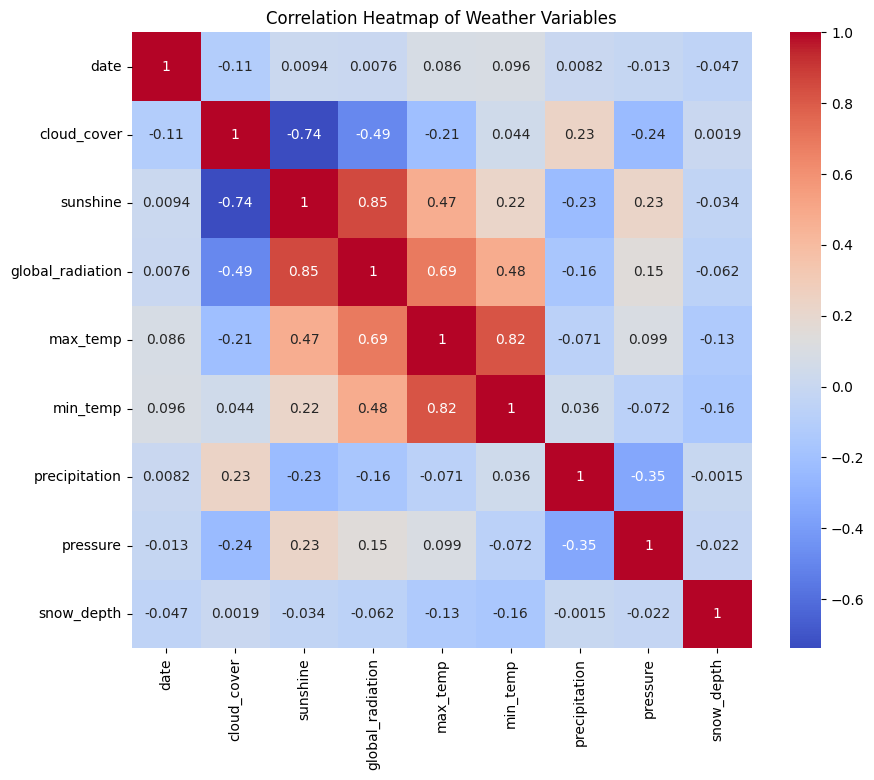

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap (replace with your desired columns)
plt.figure(figsize=(10, 8))
sns.heatmap(london_df[[ 'date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

In [34]:
pip install mlflow


## Préparation des données

In [35]:
from sklearn.model_selection import train_test_split

X = london_df.drop('mean_temp', axis=1)
y = london_df['mean_temp']

# Convert 'date' column to ordinal representation
X['date'] = pd.to_datetime(X['date']).apply(lambda date: date.toordinal())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prédir `mean_temp` avec linear regression model

In [36]:
import mlflow
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

with mlflow.start_run():
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    # Log the metrics and model
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(model, "linear_regression_model")

    print(f"Root Mean Squared Error (RMSE): {rmse}")

2024/12/07 14:47:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Root Mean Squared Error (RMSE): 0.8899035445544228


## Prédir `mean_temp` avec Régression `Ridge` et `Lasso`

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import math
import mlflow
from sklearn.model_selection import train_test_split

with mlflow.start_run(run_name="Ridge Regression"):
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    rmse_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
    mlflow.log_metric("rmse", rmse_ridge)
    mlflow.sklearn.log_model(ridge_model, "ridge_model")
    print(f"Ridge Regression RMSE: {rmse_ridge}")

with mlflow.start_run(run_name="Lasso Regression"):
    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    rmse_lasso = math.sqrt(mean_squared_error(y_test, y_pred_lasso))
    mlflow.log_metric("rmse", rmse_lasso)
    mlflow.sklearn.log_model(lasso_model, "lasso_model")
    print(f"Lasso Regression RMSE: {rmse_lasso}")

2024/12/07 14:47:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Ridge Regression RMSE: 0.8899032550998695


2024/12/07 14:47:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Lasso Regression RMSE: 0.936689229384416


## Prédir `mean_temp` avec XGboost

In [38]:
import mlflow
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split

with mlflow.start_run(run_name="XGBoost Regression"):
    # Initialize and train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use appropriate objective
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    # Log the metrics and model
    mlflow.log_metric("rmse", rmse)
    mlflow.xgboost.log_model(model, "xgboost_model")

    print(f"XGBoost Regression RMSE: {rmse}")
    print("XGBoost model training completed and logged to MLflow.")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:47:30] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/12/07 14:47:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost Regression RMSE: 0.9063410472123469
XGBoost model training completed and logged to MLflow.


## Prédir `mean_temp` avec Random Forest

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import mlflow
from sklearn.metrics import mean_squared_error
import math

with mlflow.start_run(run_name="Random Forest Regression"):
    # Initialize and train the RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune these hyperparameters
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    # Log the metrics and model with MLflow
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    print(f"Random Forest Regression RMSE: {rmse}")

2024/12/07 14:47:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Regression RMSE: 0.8898043030996997


## Comparaison des modèles en se basant sur leur RMSE

In [40]:
import mlflow
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Use search_experiments() instead of list_experiments()
experiments = client.search_experiments()

best_model = None
best_rmse = float('inf')

for experiment in experiments:
    runs = client.search_runs(experiment_ids=[experiment.experiment_id])
    for run in runs:
        metrics = run.data.metrics
        if "rmse" in metrics:  # Check if RMSE is logged for this run
            rmse = metrics["rmse"]
            if rmse < best_rmse:
                best_rmse = rmse
                best_model = run.info.run_id
                model_name = run.data.tags.get("mlflow.runName", "Unknown Model")

if best_model:
  print(f"The best model is: {model_name} with id {best_model} and RMSE: {best_rmse}")
else:
  print("No runs with RMSE found in the MLflow tracking server.")

The best model is: Random Forest Regression with id 59732b22916f47fcb744cc1189673a7d and RMSE: 0.8898043030996997


## Optimization du modèle Random Forest

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV for exhaustive search (can be slow for larger grids)
# grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# Use RandomizedSearchCV for a more efficient search
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)


# Get the best model and its hyperparameters
# best_rf_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print(f"Best hyperparameters: {best_params}")


# Evaluate the best model
y_pred = best_rf_model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Random Forest Regression RMSE: {rmse}")

# with mlflow.start_run(run_name="Random Forest Regression - GridSearch"):
#     mlflow.log_params(best_params)
#     mlflow.log_metric("rmse", rmse)
#     mlflow.sklearn.log_model(best_rf_model, "random_forest_best_model")

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Best Random Forest Regression RMSE: 0.8785364079167323


## Extraction des informations d'exécution pour les stocker dans experiment_results  et faites l'affichage

In [42]:
experiment_results = {}
client = MlflowClient()
experiments = client.search_experiments()

for experiment in experiments:
    runs = client.search_runs(experiment_ids=[experiment.experiment_id])
    for run in runs:
        metrics = run.data.metrics
        if "rmse" in metrics:
            rmse = metrics["rmse"]
            model_name = run.data.tags.get("mlflow.runName", "Unknown Model")
            experiment_results[model_name] = rmse

experiment_results

{'Random Forest Regression': 0.8898043030996997,
 'XGBoost Regression': 0.9063410472123469,
 'Lasso Regression': 0.936689229384416,
 'Ridge Regression': 0.8899032550998695,
 'big-cod-896': 0.8899035445544228}

In [43]:
!pip freeze > requirements.txt